<p>
Name &nbsp;&nbsp;&nbsp;&nbsp;: Dewandiaksa Syahda Marhaendra <br>
Class &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: DS-2 <br>
Mentor &nbsp;&nbsp;: Muhammad Fahmi <br>
</p>

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
%matplotlib inline

In [2]:
# import dataset as pandas dataframe
df_train = pd.read_csv('../input/customer-churn-dtsbinar/train.csv')
df_test = pd.read_csv('../input/customer-churn-dtsbinar/test.csv')

<h1> Exploratory Data Analysis (EDA) </h1>

<h2> Train Data </h2>

In [4]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [3]:
null_sum_train = []
null_pers_train = []
unique_value_train = []

for col in df_train.columns:
    null_sum_train.append(np.sum(df_train[col].isnull()))
    null_pers_train.append(str((np.mean(df_train[col].isnull())*100))+'%')
    unique_value_train.append(df_train[col].nunique())

(pd.DataFrame(list(zip(null_sum_train, null_pers_train,unique_value_train)),
                         index=df_train.columns,
                         columns=['Total_Null','Percentage_Null','Unique_Value'])
)

,Total_Null,Percentage_Null,Unique_Value
state,0,0.0%,51
account_length,0,0.0%,215
area_code,0,0.0%,3
international_plan,0,0.0%,2
voice_mail_plan,0,0.0%,2
number_vmail_messages,0,0.0%,46
total_day_minutes,0,0.0%,1843
total_day_calls,0,0.0%,120
total_day_charge,0,0.0%,1843
total_eve_minutes,0,0.0%,1773


In [69]:
# This dataset doesn't have any duplicated rows
df_train[df_train.duplicated()]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


<p>
    Based on the analysis above, we know that this dataset is clean from null values and duplicated rows.
</p>

<h2> Test Data </h2>

In [18]:
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [4]:
null_sum_test = []
null_pers_test = []
unique_value_test = []

for col in df_test.columns:
    null_sum_test.append(np.sum(df_test[col].isnull()))
    null_pers_test.append(str((np.mean(df_test[col].isnull())*100))+'%')
    unique_value_test.append(df_test[col].nunique())

(pd.DataFrame(list(zip(null_sum_test, null_pers_test,unique_value_test)),
                         index=df_test.columns,
                         columns=['Total_Null','Percentage_Null','Unique_Value'])
)

,Total_Null,Percentage_Null,Unique_Value
id,0,0.0%,750
state,0,0.0%,51
account_length,0,0.0%,175
area_code,0,0.0%,3
international_plan,0,0.0%,2
voice_mail_plan,0,0.0%,2
number_vmail_messages,0,0.0%,39
total_day_minutes,0,0.0%,619
total_day_calls,0,0.0%,100
total_day_charge,0,0.0%,619


In [70]:
# This dataset doesn't have any duplicated rows
df_test[df_test.duplicated()]

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls


<p>
    Based on the analysis above, we know that this dataset is clean from null values and duplicated rows.
</p>

<h3> Type of Features (Columns) in Dataset </h3>
<h4> Qualitative Features </h4>
<p>
    Based on the analysis, there are 5 columns which categorized as qualitative features. It is because their data type is an "Object" (similar to "String") and every numeric columns in this dataset are not a catergorical numeric data. These columns can also be break down into two kind of data.
    <ol>
        <li> <h4> Ordinal </h4> </li>
            Ordinal features is a categorical feature which we can order or sort its values. We not have any ordinal features in this dataset  
        <li> <h4> Nominal </h4> </li>
            Nominal features is a categorical feature which we can't order or sort its values, Columns in this dataset that categorized as ordinal features are <strong> State, Area_Code, international_plan,voice_mail_plan, and churn </strong> (Output Feature)
    </ol>
</p>
<h4> Quantitative Features </h4>
<p>
    On the other hand, in this dataset, there are 15 columns which can be categorized as quantitative features. Quantitative features is a feature that has numerical data type. We can break down this kind of feature into two categories.
    <ol>
        <li> <h4> Discrete </h4> </li>
            Discrete feature is a feature that has a integer values. The values in this kind of feature can't be a decimal. Columns in this dataset that can be categorized as discrete feature are <strong> account_lenght, number_vmail_messages, total_day_calls, total_eve_calls, total_night_calls, total_intl_calls, and number_customer_service_calls </strong>
        <li> <h4> Continous </h4> </li>
            Continous feature is a feature that has a infinity range of values. The values in this kind of feature can be a decimal. Columns in this dataset that can be categorized as discrete feature are <strong> total_day_minutes, total_day_charge, total_eve_minutes, total_eve_charge, total_night_minutes, total_night_charge, total_intl_minutes, and total_intl_charge </strong>
    </ol>
</p>

<h2> Analyzing Features </h2>


<h3> Qualitative Feature </h3>
<h4> Churn Feature (Output Feature) </h4>

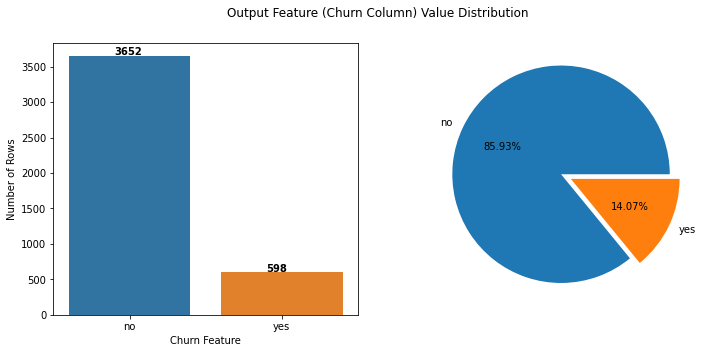

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
plt.suptitle('Output Feature (Churn Column) Value Distribution')

sns.countplot(x=df_train['churn'], ax=ax[0])
ax[0].set_ylabel('Number of Rows')
ax[0].set_xlabel('Churn Feature')
for p in ax[0].patches:
    txt = str(p.get_height())
    txt_x = p.get_x() + 0.3
    txt_y = p.get_height() + 10
    ax[0].text(txt_x, txt_y, txt, fontweight='bold')

df_train['churn'].value_counts().plot.pie(explode=[0.1,0], autopct='%.2f%%', ax=ax[1])
ax[1].set_ylabel('');

<p>
'churn' column has 2 unique value, 'yes' and 'no'. This column is our target variable. Value 'yes' means that the customer change their provider, on the other hand, value 'no' means that the customers still use the provider.<br>
Based on the visualization, value 'no' in this column is more than value 'yes'. 85.93% rows in this dataset have 'no' value. There are 3652 rows that have 'no' value and 598 rows that have 'yes' value. 
</p>

<h4> State and Area Code Features </h4>
<p>
    In this part, i will try to analyze value in two related columns (State and Area Code). 'state' column has 51 unique values and all of it is a information about customer home state. 'area_code' column give the information about customer home area code, it consist 3 unique values.
</p>

Text(108.125, 0.5, '')

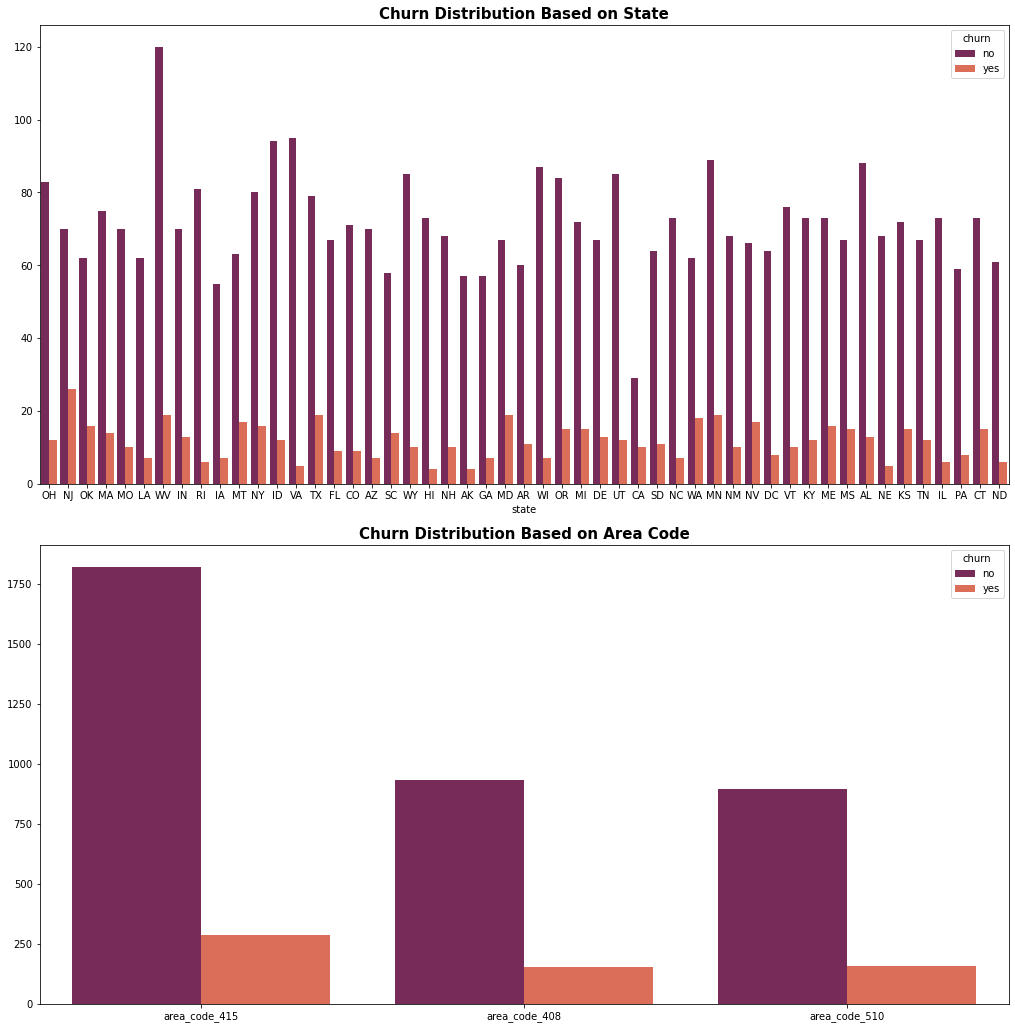

In [74]:
fig, ax = plt.subplots(2, 1, figsize=(15,15))
plt.tight_layout(pad=4)

sns.countplot(x='state', hue='churn', data=df_train, ax=ax[0], palette='rocket')
ax[0].set_title('Churn Distribution Based on State', fontweight='bold', fontsize=15)
ax[0].set_ylabel('')
sns.countplot(x='area_code', hue='churn', data=df_train, ax=ax[1], palette='rocket')
ax[1].set_title('Churn Distribution Based on Area Code', fontweight='bold', fontsize=15)
ax[1].set_xlabel('')
ax[1].set_ylabel('')

In [54]:
(
    df_train
        .assign(yes_churn = lambda df_: df_.churn == 'yes',
                no_churn = lambda df_: df_.churn == 'no'
               )
        .groupby(['state', 'area_code'])[['yes_churn','no_churn']]
        .count()
        .unstack()
        .reset_index()
        .style
        .bar(subset=['yes_churn'], color='#B8E9F7')
        .bar(subset=['no_churn'], color='#FE9C9C')
        .hide_index()
)

<p>
    State with the code of 'WV' has the highest number of customers that not churn from the provider. On the other hand, area with code 415 also has the highest number of customers that not churn from the provider.<br>
    The visualization number 3 give us an information about the distribution of customer churn based on area code in every state. It give more detail information about what first two visualizations try to explain. The distribution of customer churn based on state and area code information are distributed proportionally.
</p>

<h4> Customer's Telco Plan Features </h4>

In [258]:
print('International plan distribution:')
print(df_train['international_plan'].value_counts())

print('\nVoice mail plan distribution:')
print(df_train['voice_mail_plan'].value_counts())

International plan distribution:
no     3854
yes     396
Name: international_plan, dtype: int64

Voice mail plan distribution:
no     3138
yes    1112
Name: voice_mail_plan, dtype: int64


<AxesSubplot:xlabel='voice_mail_plan', ylabel='count'>

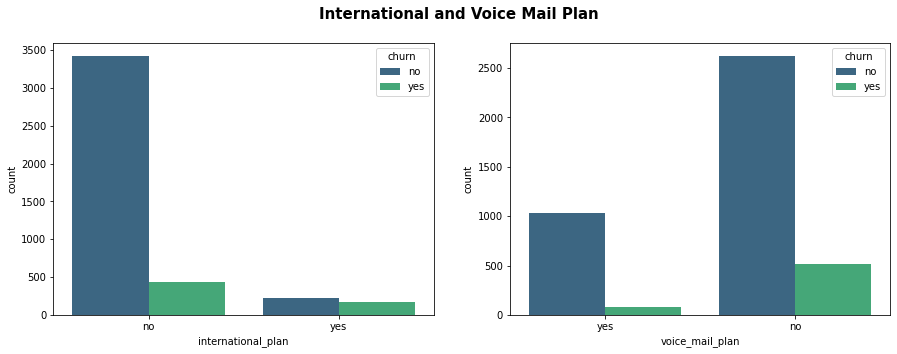

In [218]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
plt.suptitle('International and Voice Mail Plan', fontweight='bold', fontsize=15)
sns.countplot(x='international_plan', hue='churn', data=df_train, ax=ax[0], palette='viridis')
sns.countplot(x='voice_mail_plan', hue='churn', data=df_train, ax=ax[1], palette='viridis')

<p>
    The majority of data have 'no' value in either 'international_plan' column or 'voice_mail_plan' column
</p>

<h3> Quantitative Features </h3>
<p>
    Quantitative Features are a numeric feature. For this kind of feature, we can check the outlier in the data. For searching and deleting the outlier data, i use interquantile formula. Data which lower than 1.5*interquantile and higher than 1.5*interquantile will categorized as outlier data. For this formula, i make a function called 'interquantile'. This function will return a dataframe consist of the row which categorized as outlier.
</p>

In [131]:
# This function is a function to check outlier data in a column
def interquantile(df, col):
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3-q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return df[(df[col] < lower_bound) | (upper_bound < df[col])]

<h4> Account Length Feature </h4>

Text(0, 0.5, '')

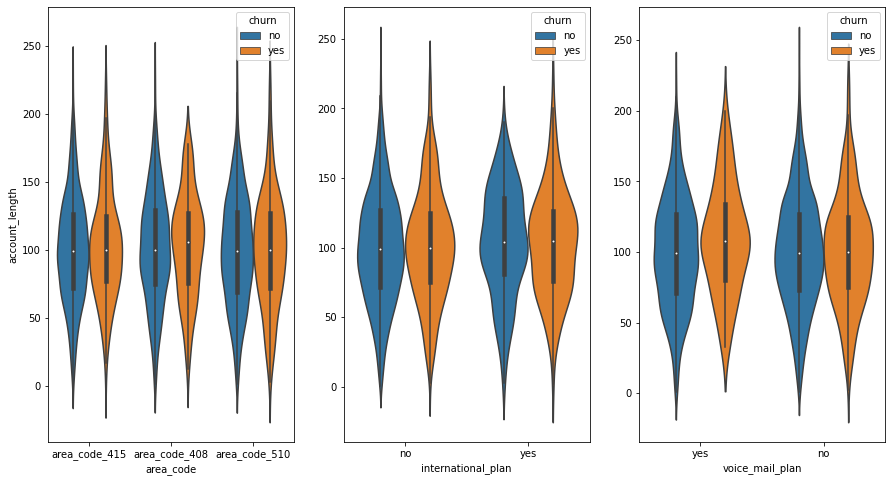

In [134]:
fig, ax = plt.subplots(1,3,figsize=(15,8))

sns.violinplot(y='account_length', x='area_code', hue='churn', data=df_train, ax=ax[0])
sns.violinplot(y='account_length', x='international_plan', hue='churn', data=df_train, ax=ax[1])
ax[1].set_ylabel('')
sns.violinplot(y='account_length', x='voice_mail_plan', hue='churn', data=df_train, ax=ax[2])
ax[2].set_ylabel('')

Text(0, 0.5, '')

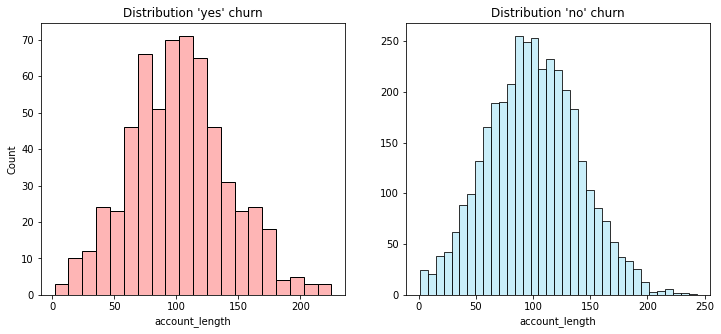

In [154]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.histplot(x = df_train[df_train['churn']=='yes']['account_length'], color='#FE9C9C', ax=ax[0])
ax[0].set_title('Distribution \'yes\' churn')
sns.histplot(x = df_train[df_train['churn']=='no']['account_length'], color='#B8E9F7', ax=ax[1])
ax[1].set_title('Distribution \'no\' churn')
ax[1].set_ylabel('')

In [132]:
print('longest account length is : {} months'.format(df_train['account_length'].max()))
print('shortest account length is : {} month'.format(df_train['account_length'].min()))
print('average account length is : {0:0.1f} months'.format(df_train['account_length'].mean()))

print('\nOUTLIER INFORMATION\nNumber of row: {}'.format(len(interquantile(df_train, 'account_length'))))
interquantile(df_train, 'account_length').sort_values(by=['churn','account_length'], ascending=[True, False]).head(5)

longest account length is : 243 months
shortest account length is : 1 month
average account length is : 100.3 months

OUTLIER INFORMATION
Number of row: 20


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
684,44,243,2,0,0,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2,0
1193,32,232,0,0,0,0,165.6,104,28.15,195.9,115,16.65,118.3,77,5.32,11.8,3,3.19,1,0
3719,11,232,1,0,0,0,248.2,128,42.19,211.2,96,17.95,147.1,117,6.62,10.0,6,2.70,2,0
1472,50,225,1,0,0,0,182.7,142,31.06,246.5,63,20.95,218.0,103,9.81,8.8,2,2.38,1,0
1593,13,224,2,0,0,0,111.4,133,18.94,175.0,66,14.88,217.2,106,9.77,5.5,6,1.49,3,0


<p>
    Values distribution in this column follows Gaussian distribution. The value of the outlier in this column still makes sense and I not gonna delete it
</p>

<h4> Number Customer Service Calls Feature </h4>

In [257]:
print('Distribution of \'number_customer_service_calls\' are:')
print(df_train['number_customer_service_calls'].value_counts().sort_index())
print('\n')
pd.crosstab([df_train['churn']],df_train['number_customer_service_calls']).T.style.background_gradient(cmap='summer_r')

Distribution of 'number_customer_service_calls' are:
0     886
1    1524
2     947
3     558
4     209
5      81
6      28
7      13
8       2
9       2
Name: number_customer_service_calls, dtype: int64




churn,no,yes
number_customer_service_calls,,
0,789,97
1,1358,166
2,845,102
3,495,63
4,117,92
5,32,49
6,9,19
7,6,7
8,1,1


Text(0, 0.5, '')

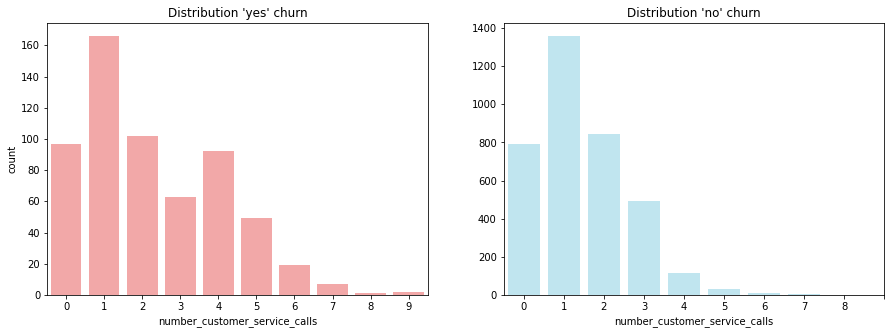

In [252]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x = df_train[df_train['churn']=='yes']['number_customer_service_calls'], color='#FE9C9C', ax=ax[0])
ax[0].set_title('Distribution \'yes\' churn')
ax[0].set_xticks(range(10))
sns.countplot(x = df_train[df_train['churn']=='no']['number_customer_service_calls'], color='#B8E9F7', ax=ax[1])
ax[1].set_title('Distribution \'no\' churn')
ax[1].set_xticks(range(10))
ax[1].set_ylabel('')

<p>
    Calls to customer service is higher when a customer want to change the provider (churn = yes)
</p>

<h4> Number of Calls Features </h4>

<p>
    There are some information shown in the dataset that related to customer doing a call. These information are the total minutes of calls, the total number of the customer doing calls, and the total charge of customer calls. These information are categorized into four kinds, it is day call, evening call, night call, and international call.
</p>

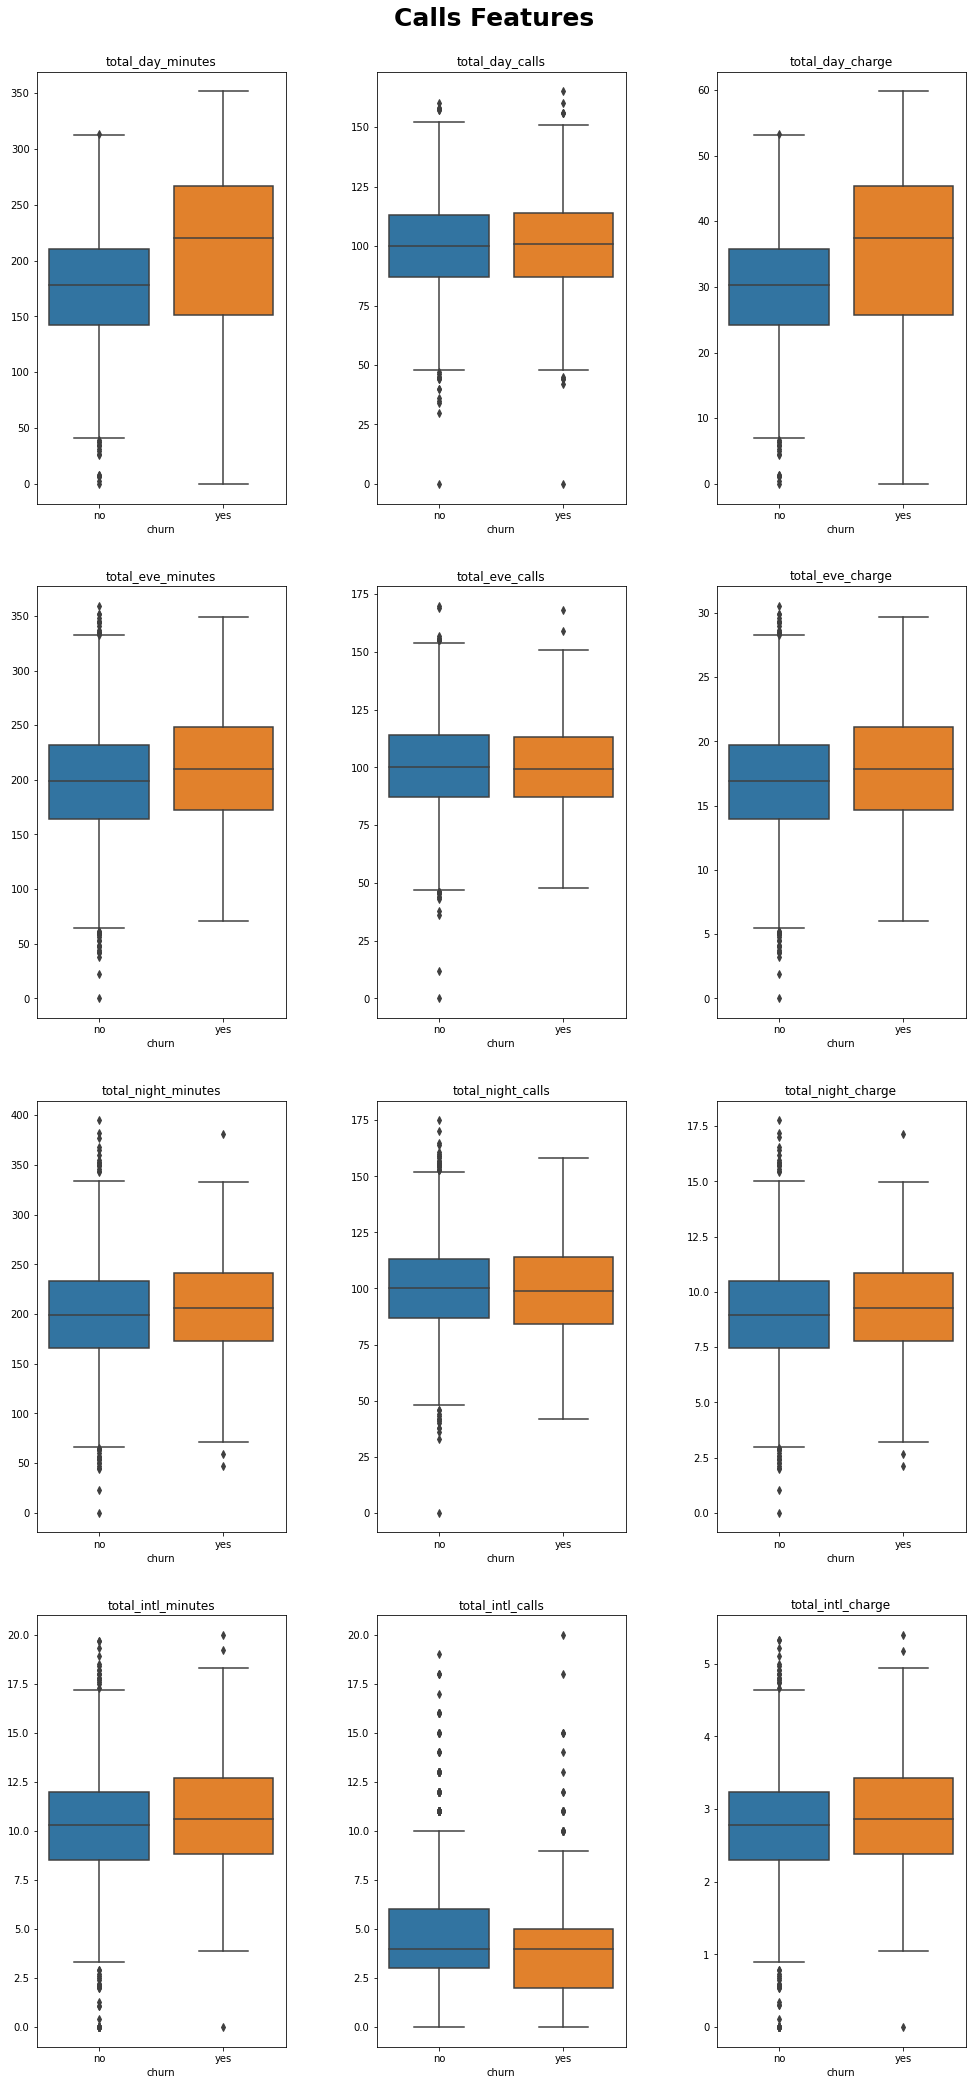

In [44]:
calls_col = [col for col in df_train if col.startswith('total')]
x,y = 0,0

fig, ax = plt.subplots(4,3, figsize=(15,30))
plt.suptitle('Calls Features', fontsize=25, fontweight='bold')
fig.tight_layout(pad=6)
plt.subplots_adjust(top=0.95)

for i in range(len(calls_col)):
    if i%3 == 0 and i != 0:
        x += 1
        y = 0
    
    sns.boxplot(y=df_train[calls_col[i]], x=df_train['churn'], ax=ax[x][y])
    ax[x][y].set_title(calls_col[i])
    ax[x][y].set_ylabel('')

    y += 1

<h4> Calls in Day </h4>

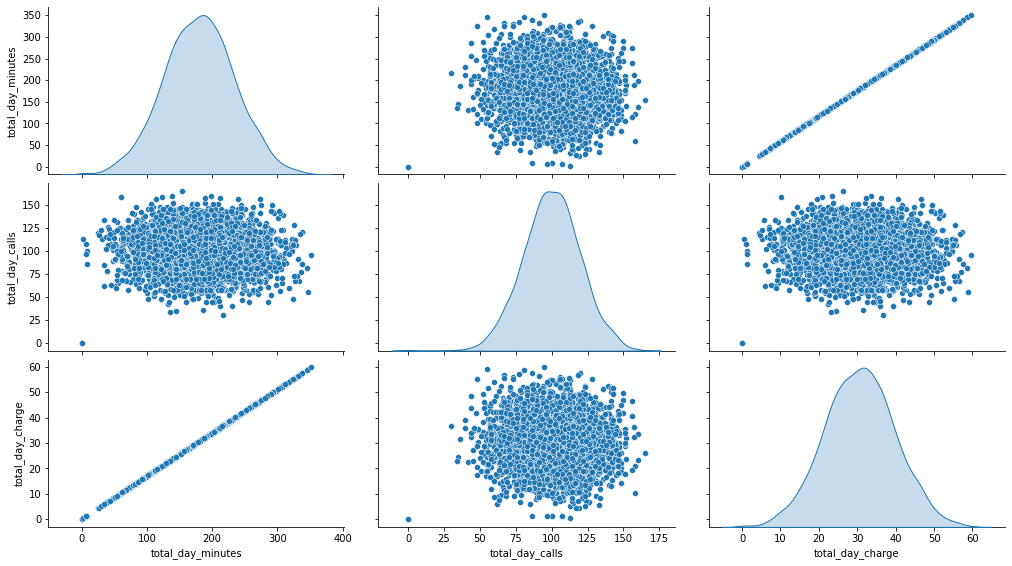

In [34]:
plot = sns.pairplot(df_train[['total_day_minutes', 'total_day_calls', 'total_day_charge']], diag_kind='kde')
plot.fig.set_size_inches(15,8)

In [56]:
print('Average charge per minutes in day call: {}'.format(df_train['total_day_charge'].mean()/df_train['total_day_minutes'].mean()))
print('Average minutes per calls in day call: {}'.format(df_train['total_day_minutes'].mean()/df_train['total_day_calls'].mean()))

print('\nTotal outlier in \'total_day_minutes\': {}'.format(interquantile(df_train, 'total_day_minutes').count()[1]))
print('Total outlier in \'total_day_calls\': {}'.format(interquantile(df_train, 'total_day_calls').count()[1]))
print('Total outlier in \'total_day_charge\': {}'.format(interquantile(df_train, 'total_day_charge').count()[1]))

interquantile(df_train, 'total_day_minutes').sample(5)
#interquantile(df_train, 'total_day_calls').sample(5)
#interquantile(df_train, 'total_day_charge').sample(5)

Average charge per minutes in day call: 0.17000305311307234
Average minutes per calls in day call: 1.8042686631842226

Total outlier in 'total_day_minutes': 25
Total outlier in 'total_day_calls': 28
Total outlier in 'total_day_charge': 26


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
2051,WI,89,area_code_415,no,no,0,326.3,112,55.47,165.1,110,14.03,162.9,97,7.33,7.5,1,2.03,1,yes
129,OH,83,area_code_415,no,no,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,yes
1805,KS,43,area_code_415,no,no,0,27.0,117,4.59,160.9,97,13.68,279.5,96,12.58,10.7,3,2.89,3,no
1138,SD,98,area_code_415,no,no,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4,yes
817,DE,129,area_code_510,no,no,0,334.3,118,56.83,192.1,104,16.33,191.0,83,8.59,10.4,6,2.81,0,yes


<h4> Calls in Evening </h4>

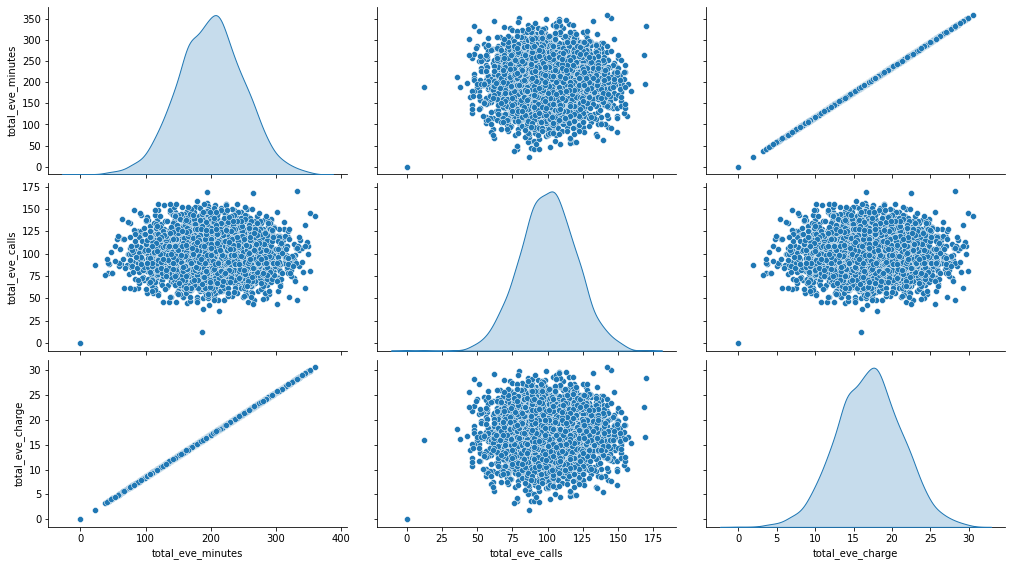

In [55]:
plot = sns.pairplot(df_train[['total_eve_minutes', 'total_eve_calls', 'total_eve_charge']], diag_kind='kde')
plot.fig.set_size_inches(15,8)

In [57]:
print('Average charge per minutes in evening call: {}'.format(df_train['total_eve_charge'].mean()/df_train['total_eve_minutes'].mean()))
print('Average minutes per calls in evening call: {}'.format(df_train['total_eve_minutes'].mean()/df_train['total_eve_calls'].mean()))

print('\nTotal outlier in \'total_eve_minutes\': {}'.format(interquantile(df_train, 'total_eve_minutes').count()[1]))
print('Total outlier in \'total_eve_calls\': {}'.format(interquantile(df_train, 'total_eve_calls').count()[1]))
print('Total outlier in \'total_eve_charge\': {}'.format(interquantile(df_train, 'total_eve_charge').count()[1]))

interquantile(df_train, 'total_eve_minutes').sample(5)
#interquantile(df_train, 'total_eve_calls').sample(5)
#interquantile(df_train, 'total_eve_charge').sample(5)

Average charge per minutes in evening call: 0.08500114782546143
Average minutes per calls in evening call: 1.9982128009395184

Total outlier in 'total_eve_minutes': 34
Total outlier in 'total_eve_calls': 24
Total outlier in 'total_eve_charge': 34


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
2859,OH,54,area_code_415,no,no,0,255.4,122,43.42,22.3,87,1.90,152.6,72,6.87,11.1,6,3.00,0,no
3873,TX,145,area_code_510,no,no,0,158.8,120,27.00,352.1,145,29.93,177.6,140,7.99,6.2,6,1.67,2,no
486,NH,114,area_code_415,no,no,0,169.6,85,28.83,58.9,86,5.01,179.3,124,8.07,7.4,8,2.00,1,no
997,NE,149,area_code_415,no,no,0,156.0,56,26.52,56.0,116,4.76,163.3,104,7.35,8.9,8,2.40,0,no
712,WA,166,area_code_408,no,no,0,274.3,110,46.63,52.9,109,4.50,246.1,119,11.07,10.9,5,2.94,0,no


<h4> Calls in Night </h4>

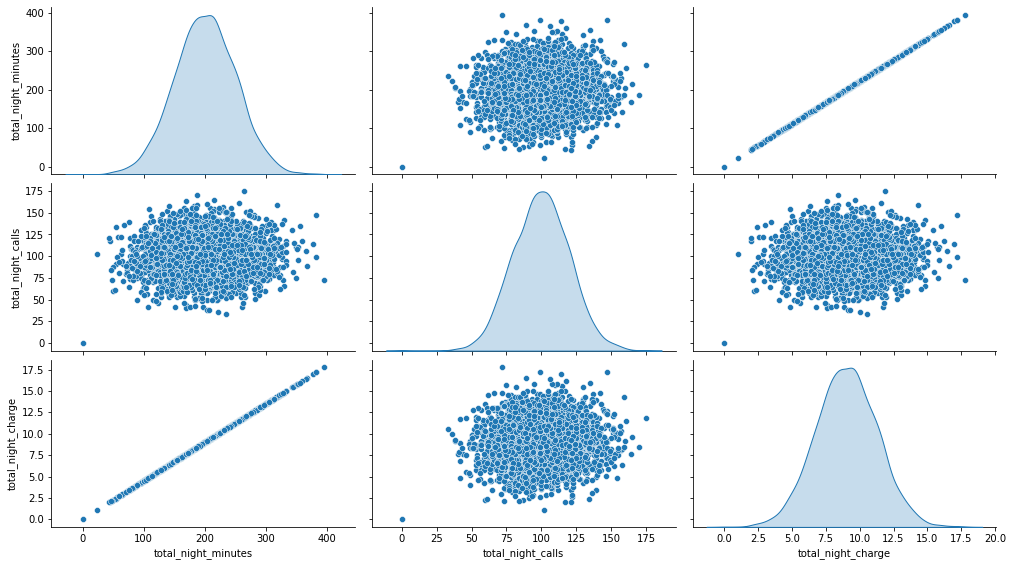

In [58]:
plot = sns.pairplot(df_train[['total_night_minutes', 'total_night_calls', 'total_night_charge']], diag_kind='kde')
plot.fig.set_size_inches(15,8)

In [59]:
print('Average charge per minutes in night call: {}'.format(df_train['total_night_charge'].mean()/df_train['total_night_minutes'].mean()))
print('Average minutes per calls in night call: {}'.format(df_train['total_night_minutes'].mean()/df_train['total_night_calls'].mean()))

print('\nTotal outlier in \'total_night_minutes\': {}'.format(interquantile(df_train, 'total_night_minutes').count()[1]))
print('Total outlier in \'total_night_calls\': {}'.format(interquantile(df_train, 'total_night_calls').count()[1]))
print('Total outlier in \'total_night_charge\': {}'.format(interquantile(df_train, 'total_night_charge').count()[1]))

interquantile(df_train, 'total_night_minutes').sample(5)
#interquantile(df_train, 'total_night_calls').sample(5)
#interquantile(df_train, 'total_night_charge').sample(5)

Average charge per minutes in night call: 0.04500068349010583
Average minutes per calls in night call: 2.00850187830825

Total outlier in 'total_night_minutes': 37
Total outlier in 'total_night_calls': 33
Total outlier in 'total_night_charge': 37


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
2865,SD,98,area_code_415,no,no,0,307.2,65,52.22,138.6,97,11.78,381.6,99,17.17,10.2,4,2.75,2,yes
3572,MA,133,area_code_415,no,no,0,207.1,106,35.21,283.5,124,24.10,65.2,107,2.93,10.5,2,2.84,3,no
1973,AR,153,area_code_408,no,no,0,154.6,56,26.28,263.0,84,22.36,367.7,89,16.55,15.5,2,4.19,1,no
1222,ID,55,area_code_510,no,yes,8,222.5,104,37.83,171.5,94,14.58,377.5,114,16.99,9.7,2,2.62,1,no
1041,OH,147,area_code_415,yes,yes,24,219.9,118,37.38,208.5,116,17.72,352.5,111,15.86,8.1,4,2.19,3,no


<h4> International Calls </h4>

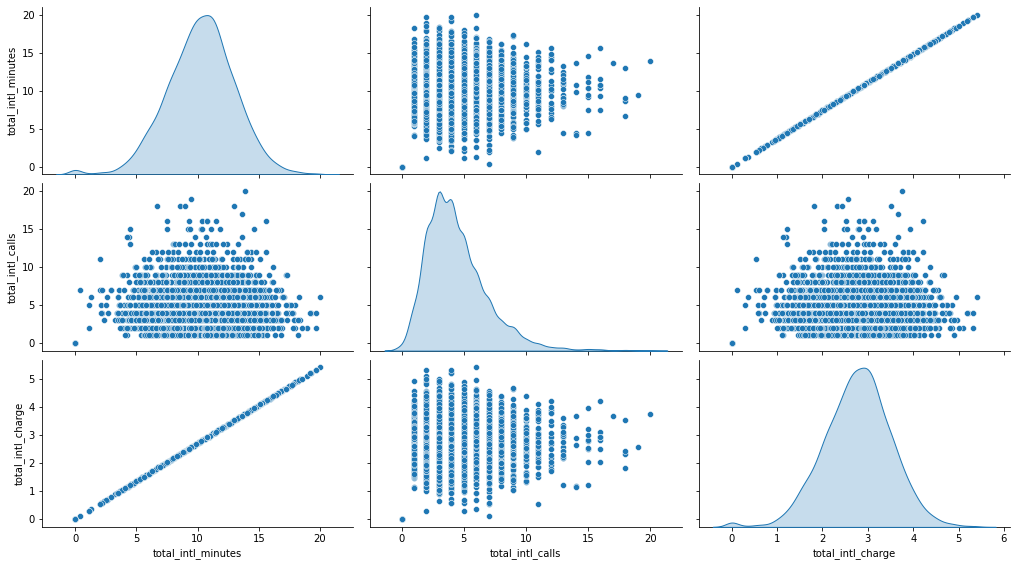

In [60]:
plot = sns.pairplot(df_train[['total_intl_minutes', 'total_intl_calls', 'total_intl_charge']], diag_kind='kde')
plot.fig.set_size_inches(15,8)

In [61]:
print('Average charge per minutes international call: {}'.format(df_train['total_intl_charge'].mean()/df_train['total_intl_minutes'].mean()))
print('Average minutes per calls international call: {}'.format(df_train['total_intl_minutes'].mean()/df_train['total_intl_calls'].mean()))

print('\nTotal outlier in \'total_intl_minutes\': {}'.format(interquantile(df_train, 'total_intl_minutes').count()[1]))
print('Total outlier in \'total_intl_calls\': {}'.format(interquantile(df_train, 'total_intl_calls').count()[1]))
print('Total outlier in \'total_intl_charge\': {}'.format(interquantile(df_train, 'total_intl_charge').count()[1]))

interquantile(df_train, 'total_intl_minutes').sample(5)
#interquantile(df_train, 'total_intl_calls').sample(5)
#interquantile(df_train, 'total_intl_charge').sample(5)

Average charge per minutes international call: 0.27005021989845895
Average minutes per calls international call: 2.3170476291728686

Total outlier in 'total_intl_minutes': 62
Total outlier in 'total_intl_calls': 100
Total outlier in 'total_intl_charge': 62


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1920,WY,94,area_code_408,no,no,0,207.0,109,35.19,167.4,80,14.23,238.2,117,10.72,2.6,6,0.70,1,no
1895,OH,83,area_code_415,no,yes,25,191.3,95,32.52,250.7,136,21.31,249.4,86,11.22,17.6,5,4.75,2,no
1666,NE,77,area_code_415,no,no,0,169.4,102,28.80,184.9,144,15.72,234.3,89,10.54,2.0,7,0.54,1,no
3703,NY,138,area_code_415,yes,no,0,261.1,96,44.39,170.9,120,14.53,71.1,89,3.20,0.0,0,0.00,3,yes
2154,CO,81,area_code_408,no,no,0,115.3,99,19.60,224.7,117,19.10,152.5,98,6.86,18.0,2,4.86,1,no


<p>
    I found that some customer doing an average minutes per call below 0.5 or 30 second. So i will delete this rows.
</p>

In [6]:
df_bill = (df_train
             .assign(day_ratio = lambda df_: df_.total_day_minutes / df_.total_day_calls,
                     eve_ratio = lambda df_: df_.total_eve_minutes / df_.total_eve_calls,
                     night_ratio = lambda df_: df_.total_night_minutes / df_.total_night_calls,
                     intl_ratio = lambda df_: df_.total_intl_minutes / df_.total_intl_charge,
                    )
          )

cols = ['total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'day_ratio', 'eve_ratio', 'night_ratio', 'intl_ratio', 'churn']
df_bill[(df_bill['day_ratio'] < .5) | (df_bill['eve_ratio'] < .5) | (df_bill['night_ratio'] < .5) | (df_bill['intl_ratio'] < .5)][[x for x in cols]].sample(5)

,total_day_minutes,total_day_calls,total_day_charge,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,day_ratio,eve_ratio,night_ratio,intl_ratio,churn
434,45.0,108,7.65,7.65,151.3,74,12.86,152.9,94,6.88,9.8,6,2.65,0.416667,2.044595,1.626596,3.698113,no
900,25.9,119,4.40,4.40,206.5,96,17.55,228.1,64,10.26,6.5,7,1.76,0.217647,2.151042,3.564062,3.693182,no
1060,160.1,107,27.22,27.22,168.7,136,14.34,23.2,102,1.04,9.5,4,2.57,1.496262,1.240441,0.227451,3.696498,no
2019,51.8,107,8.81,8.81,230.2,104,19.57,227.5,118,10.24,10.4,4,2.81,0.484112,2.213462,1.927966,3.701068,no
2691,29.9,123,5.08,5.08,129.1,117,10.97,325.9,105,14.67,8.6,6,2.32,0.243089,1.103419,3.103810,3.706897,no


<h1> Data Preprocessing and Features Selection </h1>
<h2> Data Preprocessing </h2>
<p>
    First preprocessing is deleting row in feature number_customer_service_calls.<br>
    I will delete a row that has number_customer_service_calls more or equal to 8. It is because it can be categorized as outliers and rows that have this value only four.
</p>


In [3]:
df_train.drop(df_train[df_train['number_customer_service_calls'] >= 8].index, inplace=True)

<p>
    Second preprocessing is deleting row in features about call.<br>
    I will delete a rows that have average of minutes per call below 0.5 or 30 seconds.
</p>

In [7]:
del_idx = [ x for x in df_bill[(df_bill['day_ratio'] < .5) | (df_bill['eve_ratio'] < .5) | (df_bill['night_ratio'] < .5) | (df_bill['intl_ratio'] < .5)][[x for x in cols]].index]

df_train.drop(index=[x for x in del_idx], inplace=True)

<p>
    This is the new distribution of costumer churn feature. There isn't a lot of change in the distribution because I did not delete a lot of rows.
</p>

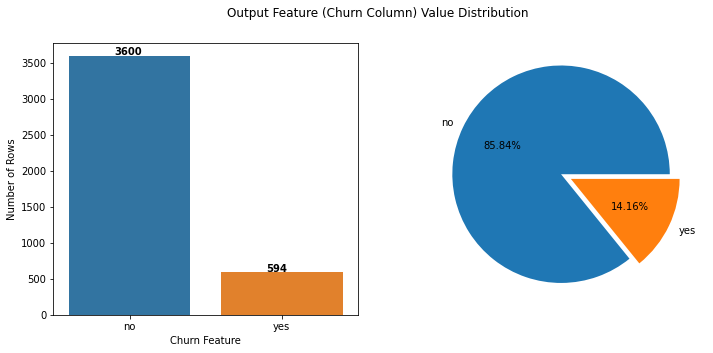

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
plt.suptitle('Output Feature (Churn Column) Value Distribution')

sns.countplot(x=df_train['churn'], ax=ax[0])
ax[0].set_ylabel('Number of Rows')
ax[0].set_xlabel('Churn Feature')
for p in ax[0].patches:
    txt = str(p.get_height())
    txt_x = p.get_x() + 0.3
    txt_y = p.get_height() + 10
    ax[0].text(txt_x, txt_y, txt, fontweight='bold')

df_train['churn'].value_counts().plot.pie(explode=[0.1,0], autopct='%.2f%%', ax=ax[1])
ax[1].set_ylabel('');

<p>
    <h2> Label Encoding </h2>
    In this part, i will transform qualitative features into numeric categorical values. For the example, in the column that has two values, 'yes' and 'no', i will transform it into numeric value. 'no' value will be transforms into 0 and 'yes' value will be transforms into 1. For this task, i will use function called 'LabelEncoder' from library sklearn.
</p>

In [99]:
le = LabelEncoder()

for col in df_train.columns:
    if df_train[col].dtype == 'O':
        df_train[col] = le.fit_transform(df_train[col])

<p>
    <h2> Selecting Features Based On Correlation </h2>
    For feature selection, i will use a correlation heat map. Value in this correlation heat map scales in the range of -1 until 1. -1 means negative correlation, 0 means no correlation, and 1 means positive correlation.
</p>

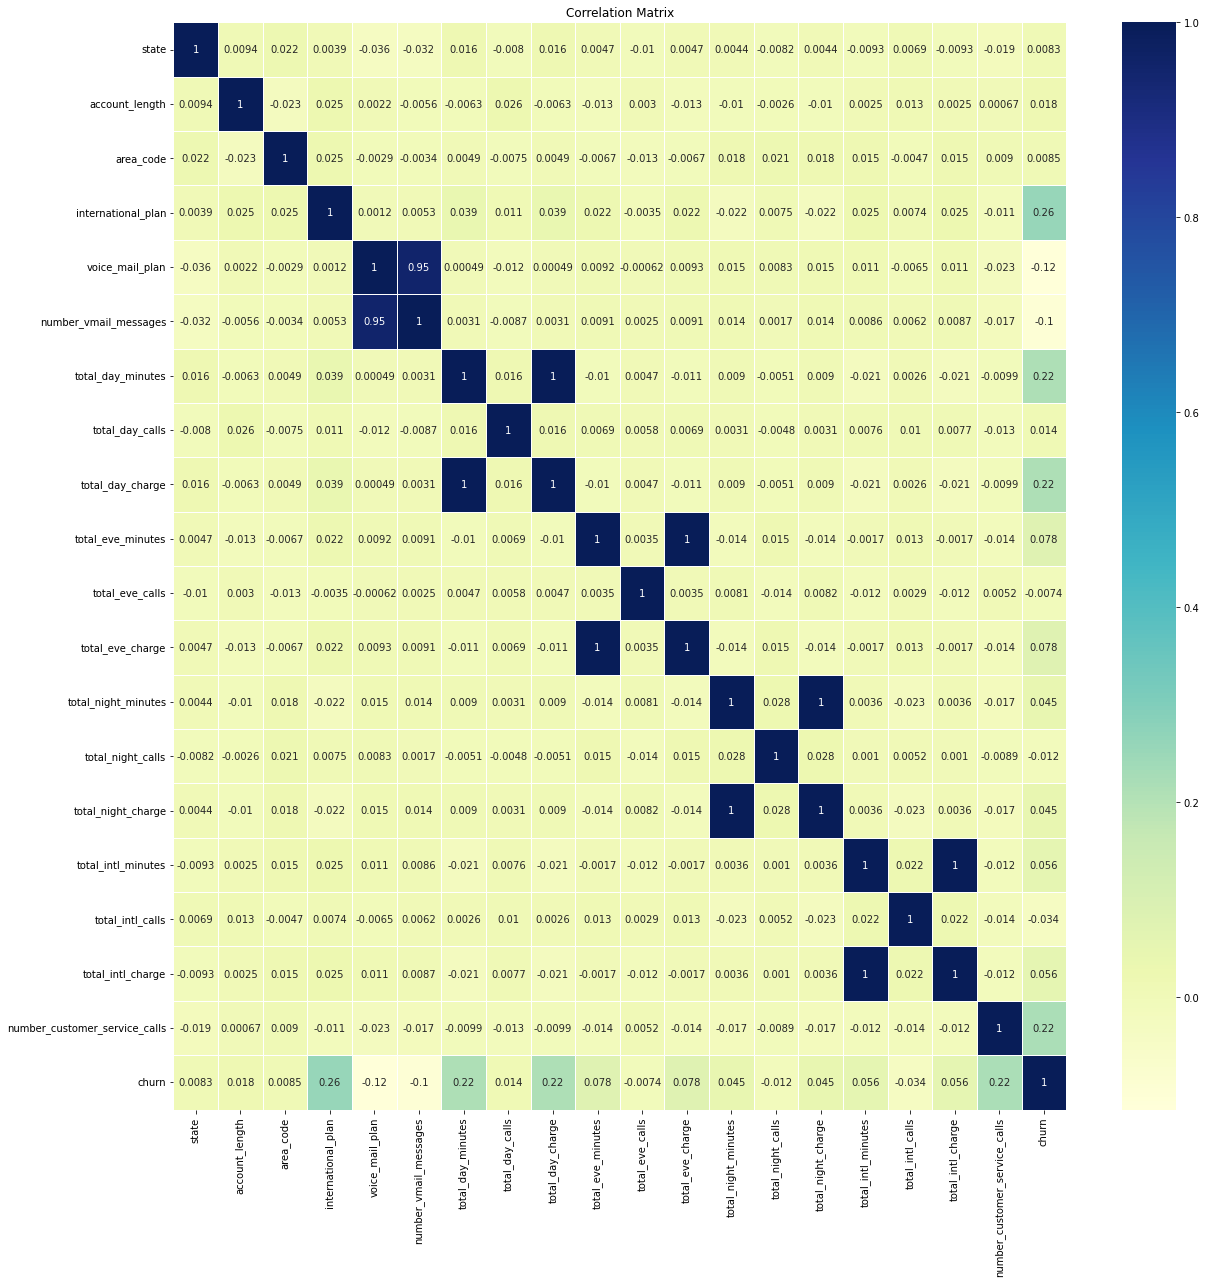

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df_train.corr(), annot=True, linewidths=.5, cmap="YlGnBu")
plt.title('Correlation Matrix', fontsize=12);

<p>
    Based on the correlation heat map, i will choose 12 features for machine learning model. 12 features are <strong>'account_length', 'area_code', 'international_plan', 'total_day_minutes', 'total_day_calls', 'total_eve_minutes', 'total_eve_calls', 'total_night_minutes', 'total_night_calls', 'total_intl_minutes', 'total_intl_calls', and 'number_customer_service_calls' </strong>. These features are choosen because they don't have a high correlation between themselves. On the other hand, these features are have a good correlation to the output feature (churn).
    <br><br> In the cell code below of this, i will make a new variable to store the independent variables and dependent variable. 'X' will represent as independent variables dataframe and 'y' will represent as dependent variable.
</p>

In [100]:
features = ['account_length', 'area_code', 'international_plan', 'total_day_minutes', 'total_day_calls', 'total_eve_minutes', 'total_eve_calls', 'total_night_minutes', 'total_night_calls', 'total_intl_minutes', 'total_intl_calls', 'number_customer_service_calls']

X = df_train[[x for x in features]]
y = df_train.iloc[:,-1]

<p>
    <h2> Splitting Train and Test (Validation) Data </h2>
    We use proportion 80% data for training and 20% for testing
</p>

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=123)

print('x train dimension : {}'.format(X_train.shape))
print('x test dimension : {}'.format(X_test.shape))
print()
print('y train dimension : {}'.format(y_train.shape))
print('y test dimension : {}'.format(y_test.shape))

x train dimension : (3355, 12)
x test dimension : (839, 12)

y train dimension : (3355,)
y test dimension : (839,)


<p>
    <h2> Features Scaling </h2>
    I use standaridization scaling for the features scaling. This method is choosen because some of independent features follow gaussian distribtion. Moreover, some of features have some data which can be categorized as outlier (because surpassing lower/upper bound interquantile), but based on analysis this different value of data still make sense regarding of the feature distribution in real life. Because of this, standaridization is the best choose.
</p>

In [102]:
stand = StandardScaler()

X_train = stand.fit_transform(X_train)
X_test = stand.transform(X_test)

<h1> Modeling </h1>
<h2> Model Training and Evaluation </h2>
<p>
    In this section, I will train some models and try to do an evaluation based on some metrics and confusion matrix. I make a function called 'eval_model', this function will gives us an information about accuracy, precision, f1 score, recall, confusion matrix, etc from the model I trained. For the model algorithm, I will use six. These models are Extreme Gradient Boosting, Support Vector Machine Classification, Logistic Regression, Decision Tree, Naive Bayes, K-Nearest Neighboor, and Linear Discriminant Analysis. 
</p>

In [12]:
# This function is for showing the evaluation metrics for the trained model and its confusion matrix
def eval_model(model, y_test, y_predict):

    print(metrics.classification_report(y_test, y_predict))
    print()
    fig, ax = plt.subplots(figsize=(8,5))
    sns.heatmap(metrics.confusion_matrix(y_test, y_predict), annot=True, cmap="YlGnBu", fmt='g', ax=ax)
    ax.set_title('Confusion Matrix Model {}'.format(model.__class__.__name__))
    ax.xaxis.set_ticklabels(['no', 'yes'])
    ax.yaxis.set_ticklabels(['no', 'yes'])

<p>
    <h3> Extreme Gradient Boosting (XGBoost) Algorithm  </h3>
</p>

In [13]:
# Fit and train the model
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
xgb_predict = xgb_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       722
           1       0.86      0.69      0.77       117

    accuracy                           0.94       839
   macro avg       0.91      0.84      0.87       839
weighted avg       0.94      0.94      0.94       839




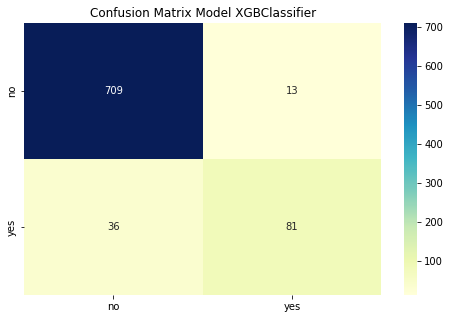

In [14]:
# Showing model evaluation
eval_model(xgb_model, y_test, xgb_predict)

<p>
    <h3> Support Vector Machine (SVM) Algorithm  </h3>
</p>

In [15]:
# Fit and train the model
svm_model = SVC()
svm_model.fit(X_train,y_train)
svm_predict = svm_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       722
           1       0.78      0.42      0.54       117

    accuracy                           0.90       839
   macro avg       0.85      0.70      0.74       839
weighted avg       0.89      0.90      0.89       839




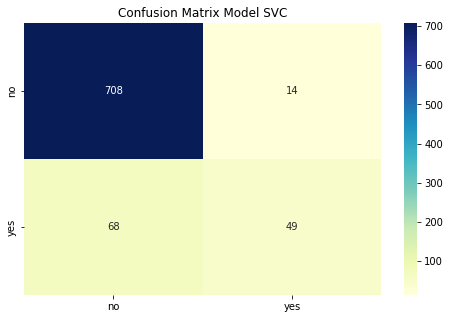

In [16]:
# Showing model evaluation
eval_model(svm_model, y_test, svm_predict)

<p>
    <h3> Logistic Regression Algorithm  </h3>
</p>

In [17]:
# Fit and train the model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predict = lr_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       722
           1       0.57      0.18      0.27       117

    accuracy                           0.87       839
   macro avg       0.72      0.58      0.60       839
weighted avg       0.84      0.87      0.84       839




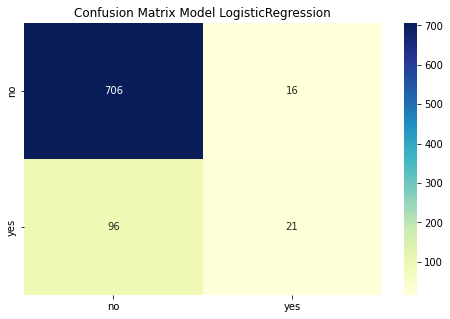

In [18]:
# Showing model evaluation
eval_model(lr_model, y_test, lr_predict)

<p>
    <h3> Decision Tree Classifier Algorithm  </h3>
</p>

In [19]:
# Fit and train the model

dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)
dtc_predict = dtc_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       722
           1       0.63      0.67      0.65       117

    accuracy                           0.90       839
   macro avg       0.79      0.80      0.79       839
weighted avg       0.90      0.90      0.90       839




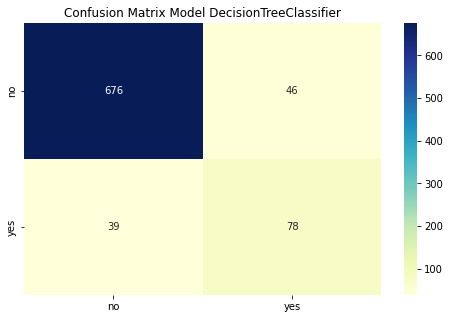

In [20]:
# Showing model evaluation
eval_model(dtc_model, y_test, dtc_predict)

<p>
    <h3> Naive Bayes Algorithm  </h3>
</p>

In [21]:
# Fit and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predict = nb_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       722
           1       0.46      0.38      0.41       117

    accuracy                           0.85       839
   macro avg       0.68      0.65      0.66       839
weighted avg       0.84      0.85      0.84       839




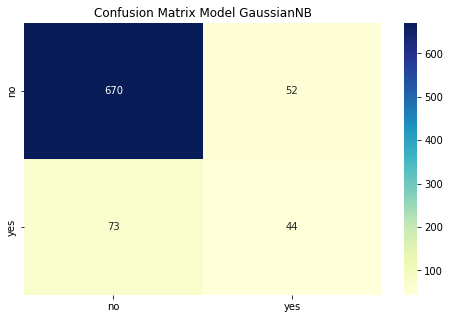

In [22]:
# Showing model evaluation
eval_model(nb_model, y_test, nb_predict)

<p>
    <h3> K-Nearest Neighbor (KNN) Algorithm  </h3>
</p>

In [29]:
# Fit and train the model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predict = knn_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       722
           1       0.66      0.20      0.30       117

    accuracy                           0.87       839
   macro avg       0.77      0.59      0.62       839
weighted avg       0.85      0.87      0.84       839




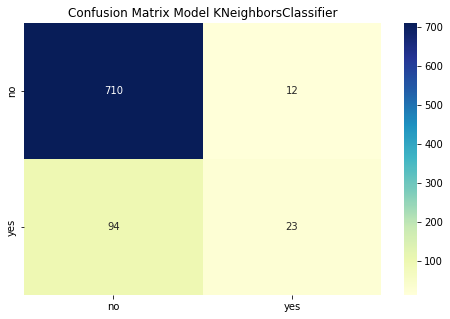

In [30]:
# Showing model evaluation
eval_model(knn_model, y_test, knn_predict)

<p>
    <h3> Linear Discriminant Analysis (LDA) Algorithm  </h3>
</p>

In [25]:
# Fit and train the model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_predict = lda_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       722
           1       0.46      0.21      0.29       117

    accuracy                           0.86       839
   macro avg       0.67      0.59      0.61       839
weighted avg       0.82      0.86      0.83       839




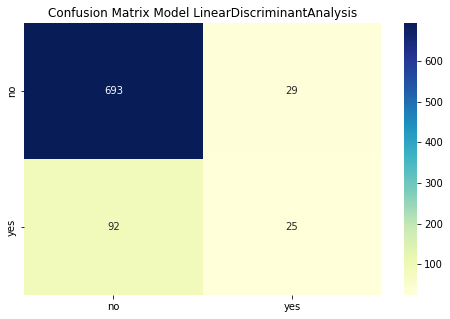

In [26]:
# Showing model evaluation
eval_model(lda_model, y_test, lda_predict)

<h2> Model Comparison </h2>

In [50]:
predics = [xgb_predict, svm_predict, lr_predict, dtc_predict, nb_predict, knn_predict, lda_predict]
acc_model = []
precision_model_no = []
precision_model_yes = []
Recall_model_no = []
Recall_model_yes = []
f1_model_no = []
f1_model_yes = []
roc_auc_model = []

for predict in predics:
    acc_model.append(metrics.accuracy_score(y_test, predict))
    precision_model_no.append(metrics.precision_score(y_test, predict, average='binary', pos_label=0))
    precision_model_yes.append(metrics.precision_score(y_test, predict, average='binary', pos_label=1))
    Recall_model_no.append(metrics.recall_score(y_test, predict, average='binary', pos_label=0))
    Recall_model_yes.append(metrics.recall_score(y_test, predict, average='binary', pos_label=1))
    f1_model_no.append(metrics.f1_score(y_test, predict, average='binary', pos_label=0))
    f1_model_yes.append(metrics.f1_score(y_test, predict, average='binary', pos_label=1))
    roc_auc_model.append(metrics.roc_auc_score(y_test, predict, average=None))


(
    pd.DataFrame(list(zip(acc_model, precision_model_no,precision_model_yes,Recall_model_no, Recall_model_yes,f1_model_no,f1_model_yes,roc_auc_model)),
                 index=['XGBoost','Support_Vector_Machine','Logistic','Decision_Tree','Naive_Bayes','KNN','Linear_Discriminant_Analysis'],
                 columns=['accuracy','precision_no','precision_yes','recall_no','recall_yes','f1_no','f1_yes','roc_auc']
                 )
                .style
                .bar(subset=['accuracy'],color=['#FF8787'])
                .bar(subset=['precision_no'], color=['#FDFDBD'])
                .bar(subset=['precision_yes'], color=['#F8C4B4'])
                .bar(subset=['recall_no'], color=['#C8FFD4'])
                .bar(subset=['recall_yes'], color=['#CDFCF6'])
                .bar(subset=['f1_no'], color=['#E9DAC1'])
                .bar(subset=['f1_yes'], color=['#B1AFFF'])
                .bar(subset=['roc_auc'], color=['#FFE3E1'])
)

,accuracy,precision_no,precision_yes,recall_no,recall_yes,f1_no,f1_yes,roc_auc
XGBoost,0.941597,0.951678,0.861702,0.981994,0.692308,0.966599,0.767773,0.837151
Support_Vector_Machine,0.902265,0.912371,0.777778,0.980609,0.418803,0.945260,0.544444,0.699706
Logistic,0.866508,0.880299,0.567568,0.977839,0.179487,0.926509,0.272727,0.578663
Decision_Tree,0.898689,0.945455,0.629032,0.936288,0.666667,0.940849,0.647303,0.801477
Naive_Bayes,0.851013,0.901750,0.458333,0.927978,0.376068,0.914676,0.413146,0.652023
KNN,0.873659,0.883085,0.657143,0.983380,0.196581,0.930537,0.302632,0.589980
Linear_Discriminant_Analysis,0.855781,0.882803,0.462963,0.959834,0.213675,0.919708,0.292398,0.586755


<p>
    Based on the Dataframe visualization above, XGBoost gives the best result. Every metric score of this algorithm always being one of the 3 best scores on each metric. Furthermore, I will use this algorithm to predict customer churn on data test.
</p>

<h1> Predict Customer Churn in Data Test </h1>

<p>
    In this section, I will try to predict customer churn from the dataset test. I make a function called 'use_model'. In this function, I will implement some preprocessing and run the model that I choose. The model that I choose is an XGBoost algorithm-based model.
</p>

In [103]:
def use_model(df, label_encoder, standarization):
    features = ['account_length', 'area_code', 'international_plan', 'total_day_minutes', 'total_day_calls', 'total_eve_minutes', 'total_eve_calls', 'total_night_minutes', 'total_night_calls', 'total_intl_minutes', 'total_intl_calls', 'number_customer_service_calls']

    X = df.loc[:,[x for x in features]]
    for col in X.columns:
        if X[col].dtype == 'O':
            X[col] = label_encoder.fit_transform(X[col])
    X = standarization.transform(X)
    df['churn'] = nb_model.predict(X)        
    return df

In [108]:
output = use_model(df_test, le, stand)
print('Predicted column distribution:\n{}'.format(output['churn'].value_counts()))
print()
output

Predicted column distribution:
0    654
1     96
Name: churn, dtype: int64



,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,1
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,0
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,...,97,19.24,202.7,111,9.12,11.3,7,3.05,0,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,...,84,22.99,241.8,112,10.88,12.3,2,3.32,3,0
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,0
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0


In [110]:
# save the output dataframe
output.to_csv('customer_churn_predict.csv', index=False)

<h1> Conclusion </h1>
<p>
    <ol>
        <li> In this project, we have to make a model to predict customer churn. This project can be divided into five parts. These parts are Exploratory Data Analysis (EDA), Data Preprocessing and Features Selection, Modeling, Predict Customer Churn in Data Test, and Conclusion </li>
        <li> The dataset given in this project is two, data train and data test. These datasets do not have any null value and duplicated rows </li>
        <li> Columns or Features in this dataset can be categorized into two different kinds, qualitative features and quantitative features. Features which categorized as qualitative features are State, Area_Code, international_plan,voice_mail_plan, and churn (output). Features which categorized as quantitative features are account_lenght, number_vmail_messages, total_day_calls, total_eve_calls, total_night_calls, total_intl_calls, number_customer_service_calls, total_day_minutes, total_day_charge, total_eve_minutes, total_eve_charge, total_night_minutes, total_night_charge, total_intl_minutes, and total_intl_charge </li>
        <li> Based on the visualization, value 'no' in this column is more than value 'yes'. 85.93% rows in this dataset have 'no' value. There are 3652 rows that have 'no' value and 598 rows that have 'yes' value. </li>
        <li> Preprocessing processes that I do in this project are deleting some rows, encoding features, and feature scaling. I deleted rows that have a value in 'number_customer_service_calls' more or equal to 8 and rows that have an average of minutes per call below 0.5 or 30 seconds. For the encoding, I use Label Encoder to change a categorical feature into a numeric feature. For feature scaling, I choose standardization because I think this is the best feature scaling for this dataset. </li>
        <li> For the modeling process, I choose seven algorithms. These algorithms are Extreme Gradient Boosting, Support Vector Machine Classification, Logistic Regression, Decision Tree, Naive Bayes, K-Nearest Neighbor, and Linear Discriminant Analysis. I will compare these models by their metrics like accuracy, precision, etc </li>
        <li> The best model is the model trained with the XGBoost algorithm. Every metric score of this algorithm always being one of the 3 best scores on each metric. </li>
    </ol>
</p>